In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# 27 Oct 2022 - Activity - Deconstructing Waves

While we observe waves in many places, it's the case that we don't often have the luxury of constructing them as we want. In fact, much of the science we do relies on measurements of voltage or current to represent the dynamics of the system. 

* Want to measure distance? Interferometry gives you a voltage to calibrate.
* Want to measure material surface properties? Voltage jumps across probes give you proxies
* Viscosity? Stick the stuff in a rheometer, squeeze it, and measure voltage changes.
* AYO exoplanets? Light curves are really just measures of voltage across a CCD.

The point is that you will almost always be dealing with signals that are proxies for the actual thing you care about. So let's construct some and deconstruct them.

Below is the code that we developed last class to investigate the signals we produced.

In [1]:
t = np.linspace(0,2,1000)
omega1 = 100
omega2 = 105
omega3 = 1000

A1 = 1
A2 = 0.9
A3 = 0.1

y1 = A1*np.cos(omega1*t)

y2 = A2*np.cos(omega2*t)
y3 = A2*np.cos(omega3*t)
y4 = A3*np.cos(omega2*t)
y5 = A3*np.cos(omega3*t)

CloseAmpCloseFreq = y1+y2
CloseAmpFarFreq = y1+y3
FarAmpCloseFreq = y1+y4
FarAmpFarFreq = y1+y5


NameError: name 'np' is not defined

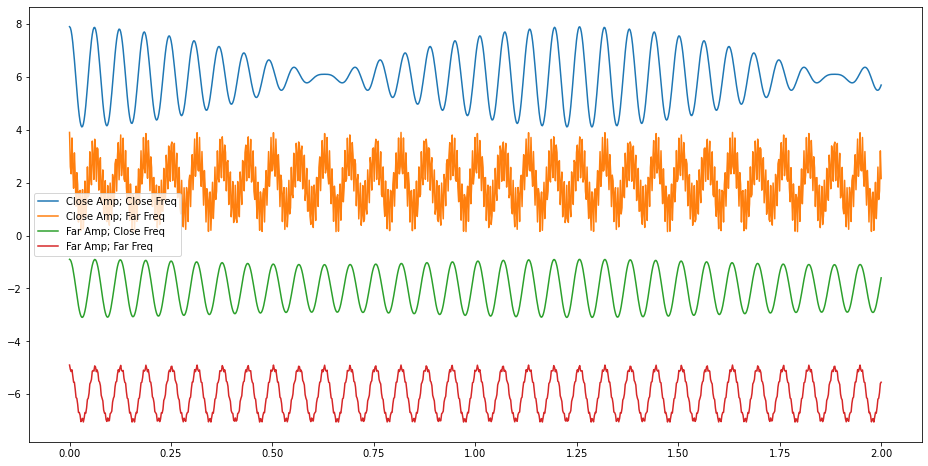

In [ ]:
fig = plt.figure(figsize=(16,8))


plt.plot(t,CloseAmpCloseFreq+6, label='Close Amp; Close Freq')
plt.plot(t,CloseAmpFarFreq+2, label='Close Amp; Far Freq')
plt.plot(t,FarAmpCloseFreq-2, label='Far Amp; Close Freq')
plt.plot(t,FarAmpFarFreq-6, label='Far Amp; Far Freq')

plt.legend()

## Questions:

1. Adjust the signals to show qualitatively how the different signals behave as you change frequencies and amplitudes.
2. Build a table that discusses qualitatively what happens as each change is made. We will compile this table together.

## Dealing with "Real" Signals

Ok, but can we find these frequencies given a signal? Or rather, how might we find the signal we need? We can use a little mathematics from Fourier.

Any periodic function in 1 dimension can be expanded as a general sum of sines and cosines:

$$f(t) = \dfrac{a_0}{2} + \sum_{n=1}^{\infty} \left(a_n sin(\omega_n t) + b_n cos(\omega_n t) \right)$$

We can show this can be written like:

$$f(t) = \sum_{-\infty}^{+\infty} c_n e^{i\omega_n t}$$

But how does this get us what we need? Our goal is to find the expansion coefficients ($a_n$'s & $b_n$'s or just the $c_n$'s), which tells us the right mix of signals to add together to get the observed one. Why is that important? Consider the signals below? How might we analyze them?

In [2]:
from scipy.signal import sawtooth, square, chirp

t = np.linspace(0,10,1000)

saw = sawtooth(t)
sq = square(t)
ch = chirp(t,6,10,1)

fig = plt.figure(figsize=(12,8))
plt.plot(t, saw, label="Sawtooth Wave")
plt.plot(t, sq+3, label='Square Wave')
plt.plot(t, ch-3, label='Chirp')
plt.legend()

NameError: name 'np' is not defined

## Integration Activity

Consider the Fourier Expansion of your choosing:

$$f(t) = \dfrac{a_0}{2} + \sum_{n=1}^{\infty} \left(a_n sin(\omega_n t) + b_n cos(\omega_n t) \right) \qquad f(t) = \sum_{-\infty}^{+\infty} c_n e^{i\omega_n t}$$

In terms of the longest period, $T_0$,

$$f(t) = \dfrac{a_0}{2} + \sum_{n=1}^{\infty} \left(a_n sin(\dfrac{2n\pi t}{T_0}) + b_n cos(\dfrac{2n\pi t}{T_0}) \right) \qquad f(t) = \sum_{-\infty}^{+\infty} c_n e^{i\dfrac{2n\pi t}{T_0}}$$

Find the expansion coefficients for the following signals (think before you integrate):

1. $f(t) = \cos(\omega_0 t)$ here $\omega_0$ corresponds to the longest known period $T_0$.
2. $f(t) = 2\sin(\omega_0 t) + 3\cos(2*\omega_0t)$
3. $f(t) = 2\sin(\omega_0 t+\pi/2) + 3\cos(2*\omega_0t)$
4. $f(t) = 1$ from 0 to $T_0/2$ and 0 from $T_0/2$ to $T_0$ repeating.... 



## 2D

We will do this together, and I will write it up for you.